## 1. Create the following dataset (1 point)

* One column per stock and concept: Open, High, Low, Close, Adj close per stock
* Date as index

Be ready for dealing with errors in the names and some missing values.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [39]:
# Reading and copying the file

stocks_raw = pd.read_csv("stocks_unclean.csv")
stocks = stocks_raw.copy()
stocks.head()

,date,variable,value
0,2020-07-14,high_AAPL,9.725500e+01
1,2021-10-22,volume_AMZN,3.139100e+06
2,2021-06-04,volume_MSFT,2.528110e+07
3,2021-06-28,volume_AMZN,2.242800e+06
4,2021-11-23,low_GOOG,NaN


In [40]:
# Transform to datetime

stocks["date"] = pd.to_datetime(stocks["date"])

In [41]:
# Creating the pivot

stocks_a = stocks.pivot_table(index = "date", columns = "variable", values = "value")
stocks_a.head()

variable,close_AAPL,close_AMZ,close_AMZN,close_APL,close_GOG,close_GOOG,close_MSFT,close_MST,high_AAPL,high_AMZ,...,open_MSFT,open_MST,volume_AAPL,volume_AMZ,volume_AMZN,volume_APL,volume_GOG,volume_GOOG,volume_MSFT,volume_MST
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,NaN,1847.839966,NaN,NaN,1337.020020,157.699997,NaN,73.419998,1853.26001,...,156.770004,NaN,100805600.0,NaN,2506500.0,NaN,NaN,961800.0,18369400.0,NaN
2020-01-02,75.087502,NaN,1898.010010,NaN,NaN,1367.369995,160.619995,NaN,75.150002,NaN,...,158.779999,NaN,135480400.0,NaN,4029000.0,NaN,NaN,1406600.0,22622100.0,NaN
2020-01-03,74.357498,NaN,1874.969971,NaN,NaN,1360.660034,158.619995,NaN,75.144997,NaN,...,158.320007,NaN,146322800.0,NaN,3764400.0,NaN,NaN,1186400.0,21116200.0,NaN
2020-01-06,74.949997,NaN,1902.880005,NaN,NaN,1394.209961,159.029999,NaN,74.989998,NaN,...,157.080002,NaN,118387200.0,NaN,4061800.0,NaN,NaN,1732300.0,20813700.0,NaN
2020-01-07,74.597504,NaN,1906.859985,NaN,NaN,1393.339966,157.580002,NaN,75.224998,NaN,...,159.320007,NaN,108872000.0,NaN,4044900.0,NaN,NaN,1502700.0,21634100.0,NaN


# Multiindex

I am going to work in this assignment without Multiindex, however, I could have created it as follow:

1. stocks_b = stocks_a["variable"].str.split("_", expand = True)
2. stocks_c = pd.concat([stocks_a, stocks_b], axis = 1) => alternatively also with merge function
3. stocks_d = pd.pivot_table(data = stocks_c, values = "value", index = "date", columns = [1, "variable"])


below I continue with data-cleaning


In [42]:
# Ziping together and fill NaN with the corresponding column

concepts = ["open","close", "high", "low","volume"]
names = ["AAPL", "AMZN", "GOOG", "MSFT"]
wnames = ["APL", "AMZ" ,"GOG", "MST"]

for concept in concepts:
    for name, wname in zip(names,wnames):
            stocks_a[f"{concept}_{name}"].fillna(stocks_a[f"{concept}_{wname}"], inplace=True)

In [43]:
# Drop the wrong columns with regex

stocks_b = stocks_a[stocks_a.columns.drop(list(stocks_a.filter(regex= '\_[A-Z]{3}$')))]

In [44]:
stocks_b.head()

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.0,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.0,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.5,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.0,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.5,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0


In [45]:
# Fill the remaining NaN with backward fill and not interpolate since we have a timeseries 

stocks_clean = stocks_b.fillna(method="bfill")

In [46]:
# To check if there are any NaN's left

stocks_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2019-12-31 to 2022-01-25
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close_AAPL   522 non-null    float64
 1   close_AMZN   522 non-null    float64
 2   close_GOOG   522 non-null    float64
 3   close_MSFT   522 non-null    float64
 4   high_AAPL    522 non-null    float64
 5   high_AMZN    522 non-null    float64
 6   high_GOOG    522 non-null    float64
 7   high_MSFT    522 non-null    float64
 8   low_AAPL     522 non-null    float64
 9   low_AMZN     522 non-null    float64
 10  low_GOOG     522 non-null    float64
 11  low_MSFT     522 non-null    float64
 12  open_AAPL    522 non-null    float64
 13  open_AMZN    522 non-null    float64
 14  open_GOOG    522 non-null    float64
 15  open_MSFT    522 non-null    float64
 16  volume_AAPL  522 non-null    float64
 17  volume_AMZN  522 non-null    float64
 18  volume_GOOG  521 non-null    fl

In [47]:
stocks_clean.head()

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.0,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.0,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,156.509995,74.287498,1864.5,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,1390.380005,156.509995,73.447502,1860.0,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.5,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0


## 2. Visualize the data (1.5 point)

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points)
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 point)

Text(0.5, 1.0, 'MSFT stock')

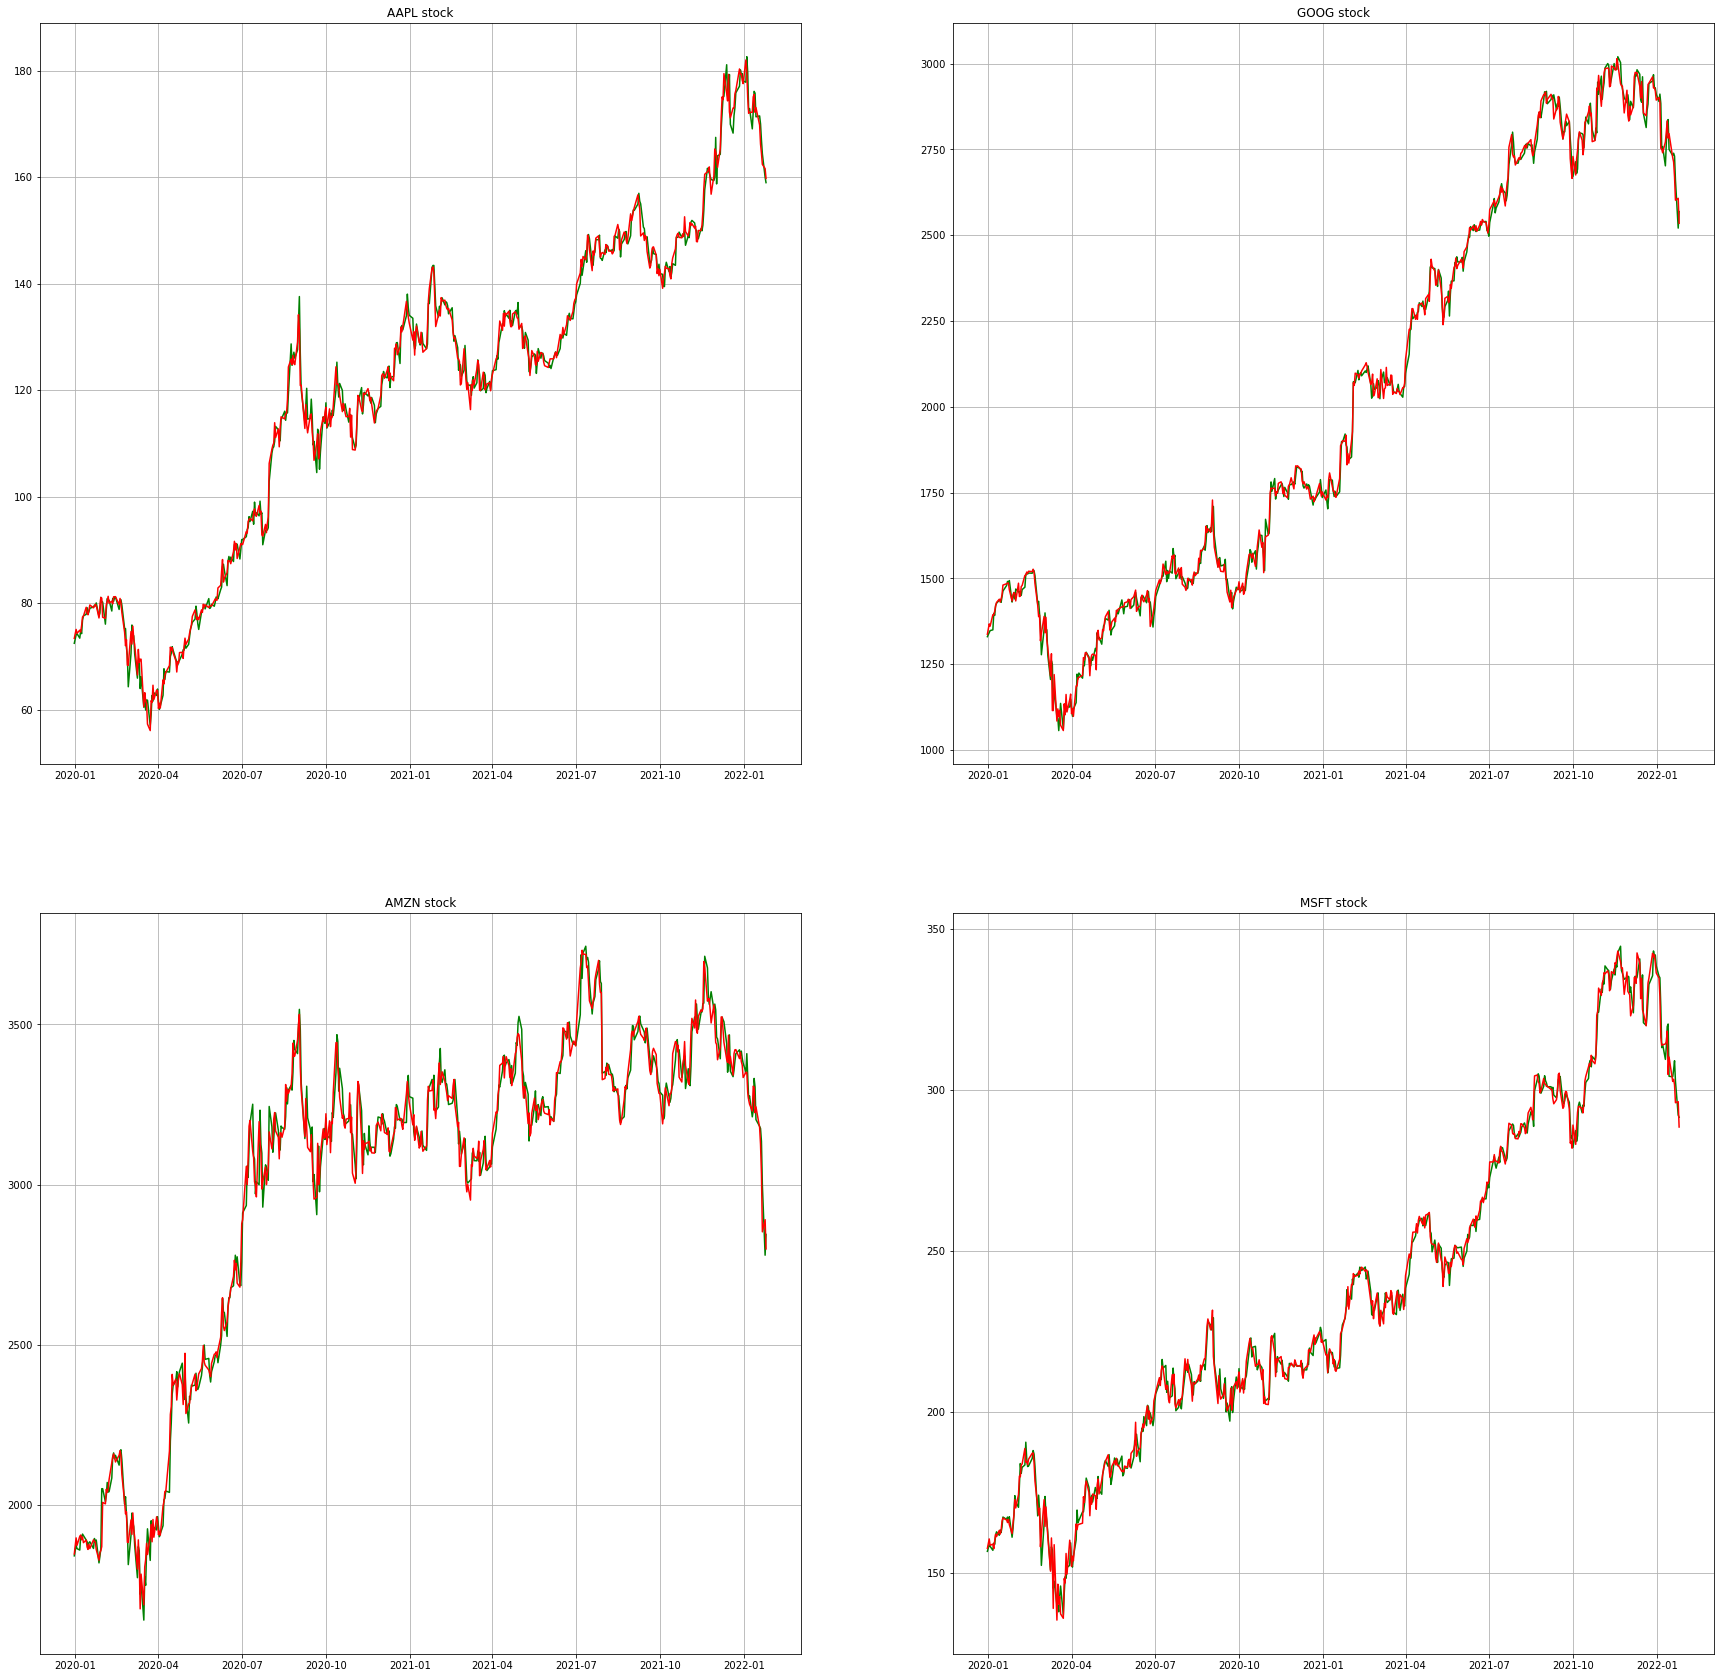

In [48]:
# Plotting the open and close of each stock in a 2x2 grid
# Applying grid for better visability

fig, ax = plt.subplots(2,2, figsize = (30,30))

ax[0,0].plot(stocks_clean.index, stocks_clean["open_AAPL"], label = "open", c = "g")
ax[0,0].plot(stocks_clean.index, stocks_clean["close_AAPL"], label = "close", c = "r")
ax[0,0].grid()
ax[0,0].set_title("AAPL stock")

ax[1,0].plot(stocks_clean.index, stocks_clean["open_AMZN"], label = "open", c = "g" )
ax[1,0].plot(stocks_clean.index, stocks_clean["close_AMZN"], label = "close", c = "r" )
ax[1,0].grid()
ax[1,0].set_title("AMZN stock")

ax[0,1].plot(stocks_clean.index, stocks_clean["open_GOOG"], label = "open", c = "g" )
ax[0,1].plot(stocks_clean.index, stocks_clean["close_GOOG"], label = "close", c = "r" )
ax[0,1].grid()
ax[0,1].set_title("GOOG stock")

ax[1,1].plot(stocks_clean.index, stocks_clean["open_MSFT"], label = "open", c = "g" )
ax[1,1].plot(stocks_clean.index, stocks_clean["close_MSFT"], label = "close", c = "r" )
ax[1,1].grid()
ax[1,1].set_title("MSFT stock")

Text(0.5, 1.0, 'AMZN weekly mean')

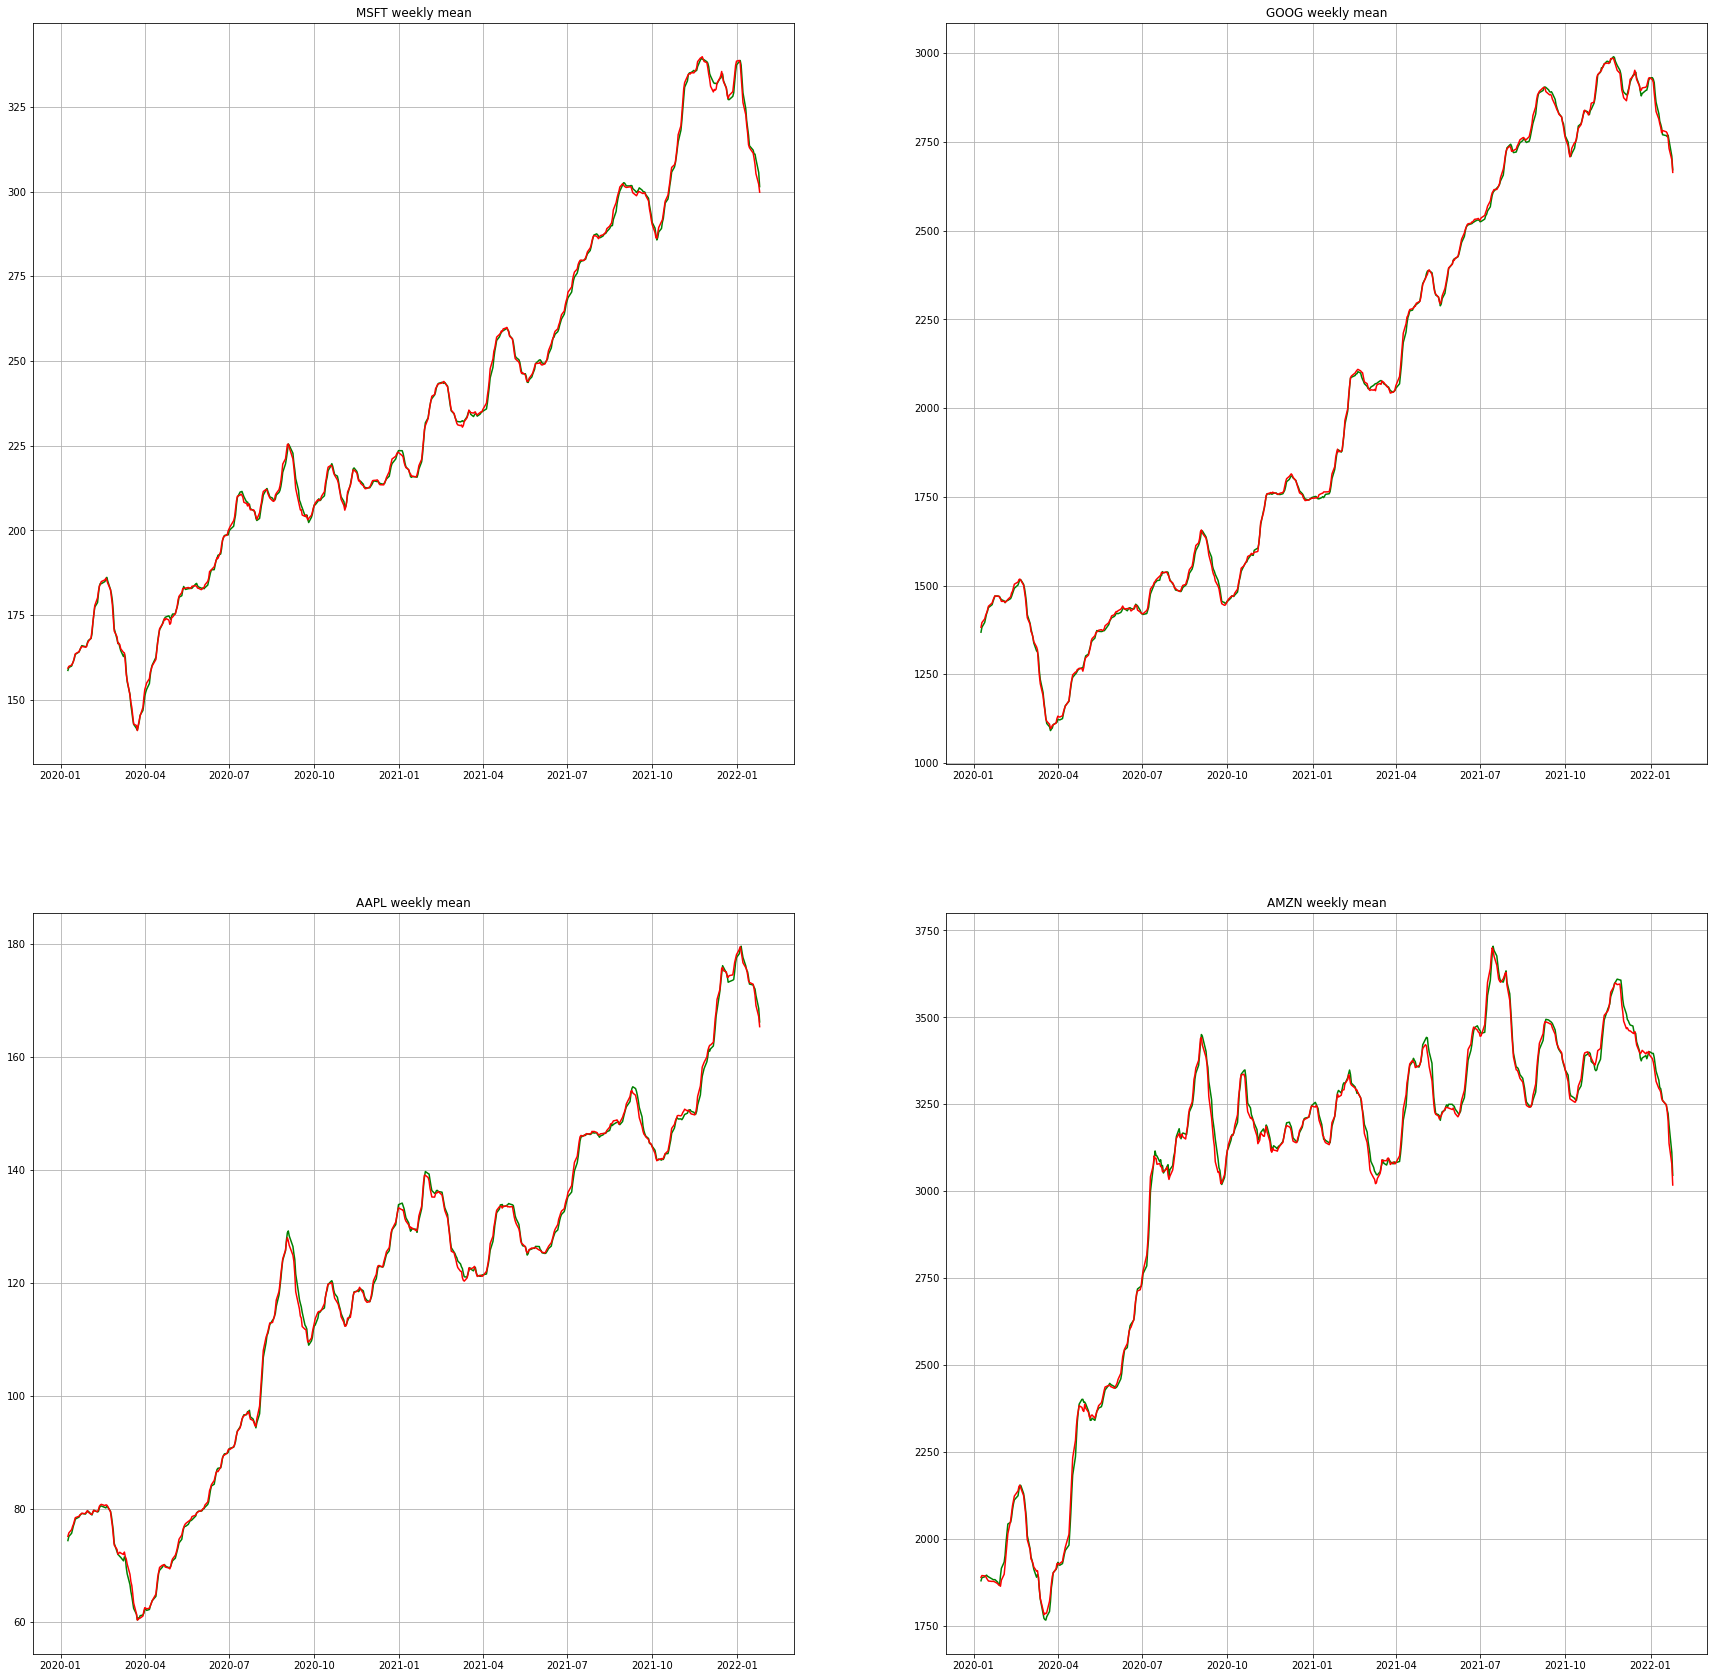

In [49]:
# Doing the same as before but with weekly avg. => rolling mean
# Alternatively we could also use resample("w").mean()

stocks_clean_msft_o = stocks_clean["open_MSFT"].rolling(7).mean()
stocks_clean_msft_c = stocks_clean["close_MSFT"].rolling(7).mean()
stocks_clean_aapl_o = stocks_clean["open_AAPL"].rolling(7).mean()
stocks_clean_aapl_c = stocks_clean["close_AAPL"].rolling(7).mean()
stocks_clean_goog_o = stocks_clean["open_GOOG"].rolling(7).mean()
stocks_clean_goog_c = stocks_clean["close_GOOG"].rolling(7).mean()
stocks_clean_amzn_o = stocks_clean["open_AMZN"].rolling(7).mean()
stocks_clean_amzn_c = stocks_clean["close_AMZN"].rolling(7).mean()

fig, ax = plt.subplots(2,2, figsize = (30,30))

ax[0,0].plot(stocks_clean.index, stocks_clean_msft_o, label = "open", c = "g")
ax[0,0].plot(stocks_clean.index, stocks_clean_msft_c, label = "close", c = "r")
ax[0,0].grid()
ax[0,0].set_title("MSFT weekly mean")

ax[1,0].plot(stocks_clean.index, stocks_clean_aapl_o, label = "open", c = "g")
ax[1,0].plot(stocks_clean.index, stocks_clean_aapl_c, label = "close", c = "r")
ax[1,0].grid()
ax[1,0].set_title("AAPL weekly mean")

ax[0,1].plot(stocks_clean.index, stocks_clean_goog_o, label = "open", c = "g" )
ax[0,1].plot(stocks_clean.index, stocks_clean_goog_c, label = "close", c = "r" )
ax[0,1].grid()
ax[0,1].set_title("GOOG weekly mean")

ax[1,1].plot(stocks_clean.index, stocks_clean_amzn_o, label = "open", c = "g" )
ax[1,1].plot(stocks_clean.index, stocks_clean_amzn_c, label = "close", c = "r" )
ax[1,1].grid()
ax[1,1].set_title("AMZN weekly mean")

Text(0.5, 1.0, 'Volatility MSFT')

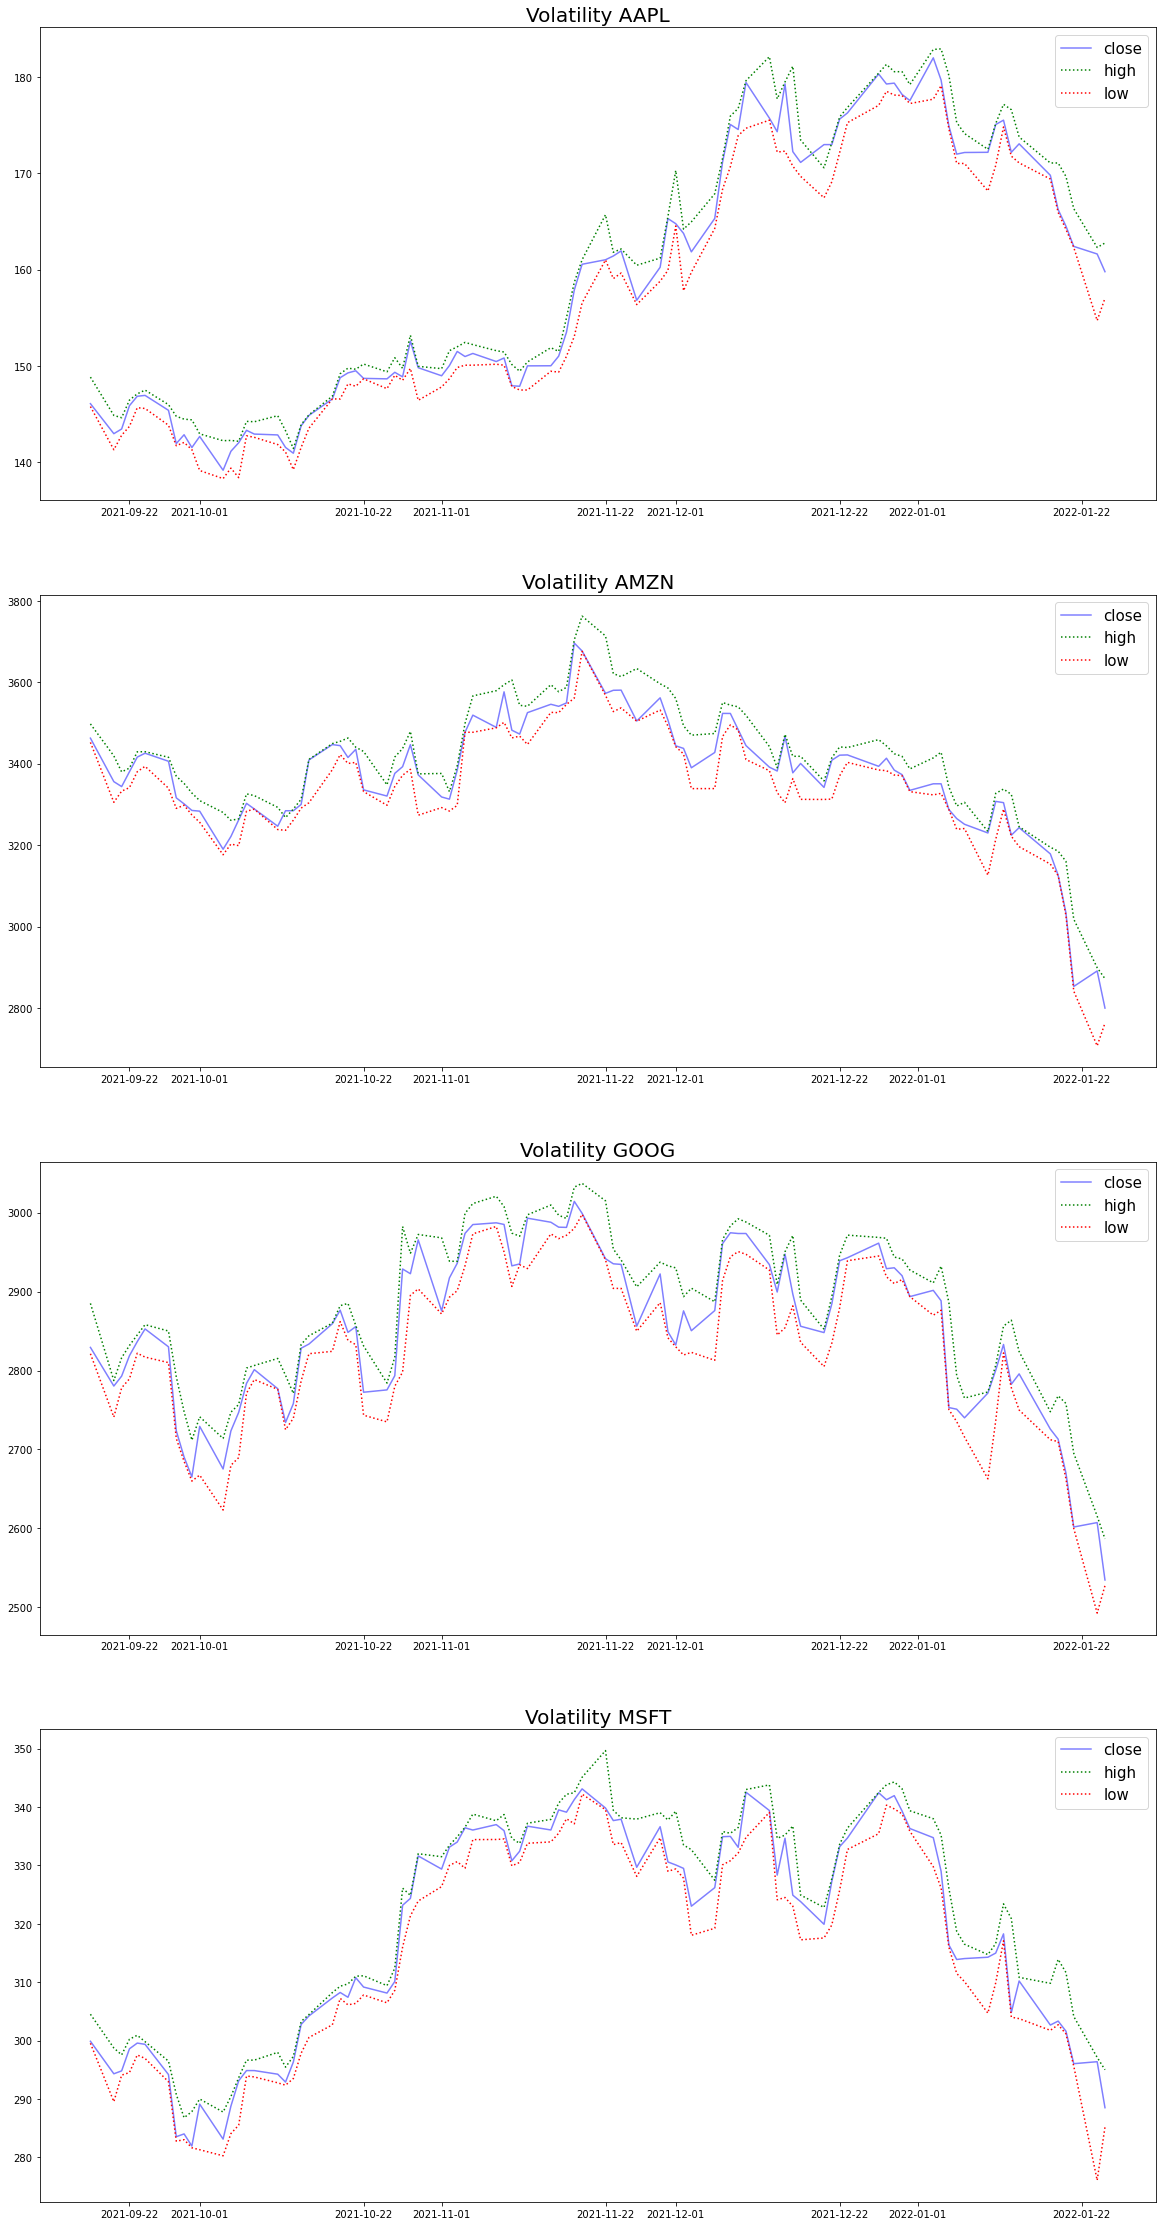

In [50]:
# To check how volatile the stock was the last 365 days => the bigger the space inbetween the lines, the greater the volatility
# added alpha for the blue line for better visability

fig, ax = plt.subplots(4,1, figsize = (20,40))

ax[0].plot(stocks_clean["close_AAPL"].iloc[-90:], label = "close", c = "blue", alpha = 0.5)
ax[0].plot(stocks_clean["high_AAPL"].iloc[-90:], label = "high", c = "green", linestyle = "dotted")
ax[0].plot(stocks_clean["low_AAPL"].iloc[-90:], label = "low", c = "red", linestyle = "dotted")
ax[0].legend(fontsize = 15)
ax[0].set_title("Volatility AAPL", fontsize = 20)

ax[1].plot(stocks_clean["close_AMZN"].iloc[-90:], label = "close", c = "blue", alpha = 0.5)
ax[1].plot(stocks_clean["high_AMZN"].iloc[-90:], label = "high", c = "green", linestyle = "dotted")
ax[1].plot(stocks_clean["low_AMZN"].iloc[-90:], label = "low", c = "red", linestyle = "dotted")
ax[1].legend(fontsize = 15)
ax[1].set_title("Volatility AMZN", fontsize = 20)

ax[2].plot(stocks_clean["close_GOOG"].iloc[-90:], label = "close", c = "blue", alpha = 0.5)
ax[2].plot(stocks_clean["high_GOOG"].iloc[-90:], label = "high", c = "green", linestyle = "dotted")
ax[2].plot(stocks_clean["low_GOOG"].iloc[-90:], label = "low", c = "red", linestyle = "dotted")
ax[2].legend(fontsize = 15)
ax[2].set_title("Volatility GOOG", fontsize = 20)

ax[3].plot(stocks_clean["close_MSFT"].iloc[-90:], label = "close", c = "blue", alpha = 0.5)
ax[3].plot(stocks_clean["high_MSFT"].iloc[-90:], label = "high", c = "green", linestyle = "dotted")
ax[3].plot(stocks_clean["low_MSFT"].iloc[-90:], label = "low", c = "red", linestyle = "dotted")
ax[3].legend(fontsize = 15)
ax[3].set_title("Volatility MSFT", fontsize = 20)




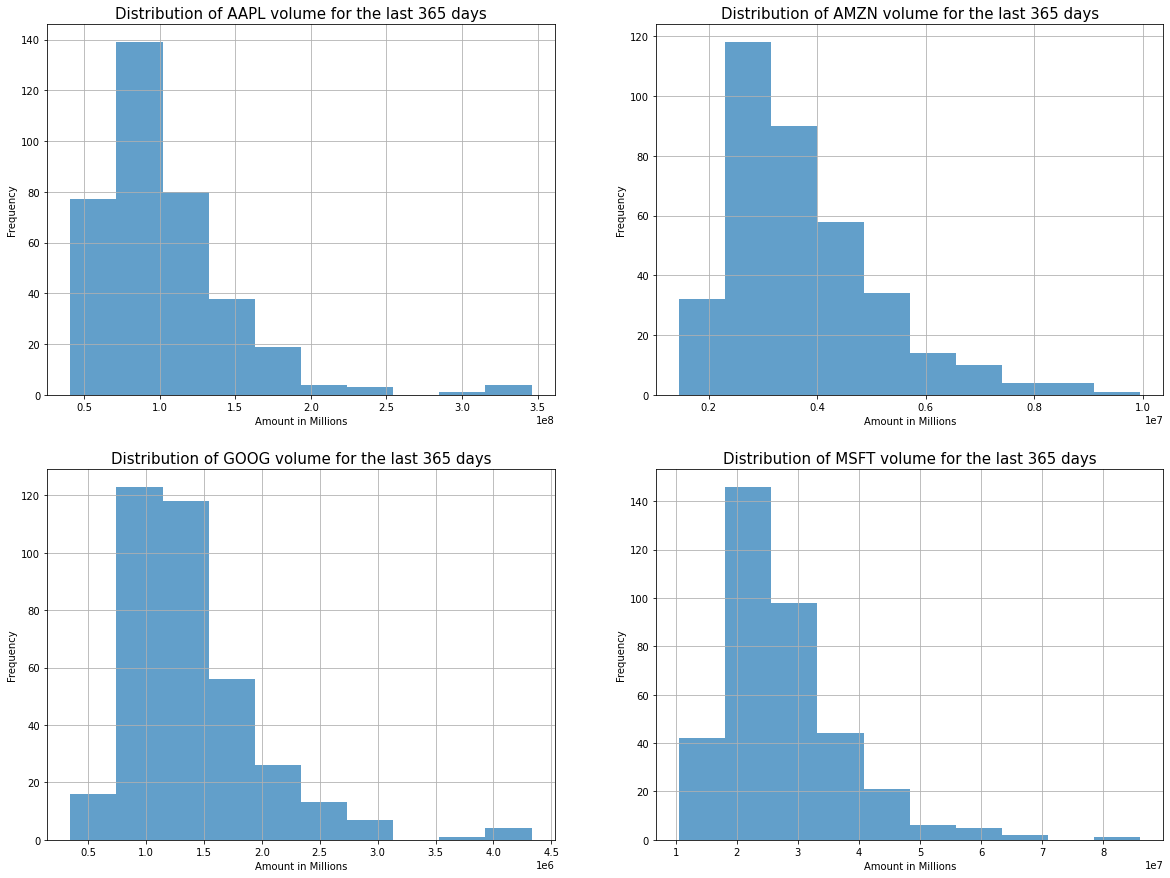

In [51]:
# To check how stable the volume of the stock was the last 365 days => the narrower the distribution the more stable the stock

fig, ax = plt.subplots(2,2, figsize = (20, 15))

ax[0,0].hist(stocks_clean["volume_AAPL"].iloc[-365:], bins=10, alpha = 0.7)
ax[0,0].set_xlabel("Amount in Millions", fontsize = 10)
ax[0,0].set_ylabel("Frequency", fontsize = 10)
ax[0,0].set_title("Distribution of AAPL volume for the last 365 days", fontsize = 15)
ax[0,0].grid(True)

ax[0,1].hist(stocks_clean["volume_AMZN"].iloc[-365:], bins=10, alpha = 0.7)
ax[0,1].set_xlabel("Amount in Millions", fontsize = 10)
ax[0,1].set_ylabel("Frequency", fontsize = 10)
ax[0,1].set_title("Distribution of AMZN volume for the last 365 days", fontsize = 15)
ax[0,1].grid(True)

ax[1,0].hist(stocks_clean["volume_GOOG"].iloc[-365:], bins=10, alpha = 0.7)
ax[1,0].set_xlabel("Amount in Millions", fontsize = 10)
ax[1,0].set_ylabel("Frequency", fontsize = 10)
ax[1,0].set_title("Distribution of GOOG volume for the last 365 days", fontsize = 15)
ax[1,0].grid(True)

ax[1,1].hist(stocks_clean["volume_MSFT"].iloc[-365:], bins=10, alpha = 0.7)
ax[1,1].set_xlabel("Amount in Millions", fontsize = 10)
ax[1,1].set_ylabel("Frequency", fontsize = 10)
ax[1,1].set_title("Distribution of MSFT volume for the last 365 days", fontsize = 15)
ax[1,1].grid(True)



## 3. Create a function that calculates the Return of Investment (ROI) (1 point)

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it.

$$ ROI = \frac{FVI - IVI}{IVI} * 100$$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data

In [52]:
# Creating a ROI function as requested by using shift()

def ROI(name, data, lookback):
    return (data[f"close_{name}"] - (data[f"close_{name}"].shift(lookback))) / (data[f"close_{name}"].shift(lookback))



In [53]:
# Check
ROI("AAPL", stocks_clean, 365)

date
2019-12-31         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2022-01-19    0.496051
2022-01-20    0.459360
2022-01-21    0.484891
2022-01-24    0.430139
2022-01-25    0.389270
Name: close_AAPL, Length: 522, dtype: float64

## 4. Apply the roi function to the portfolio (1.5 point)

Create as many ROI columns as different stocks you have in the portfolio and plot them in a 2x2 grid, representing for each stock:
* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

Text(0.5, 0.98, 'ROI per stock')

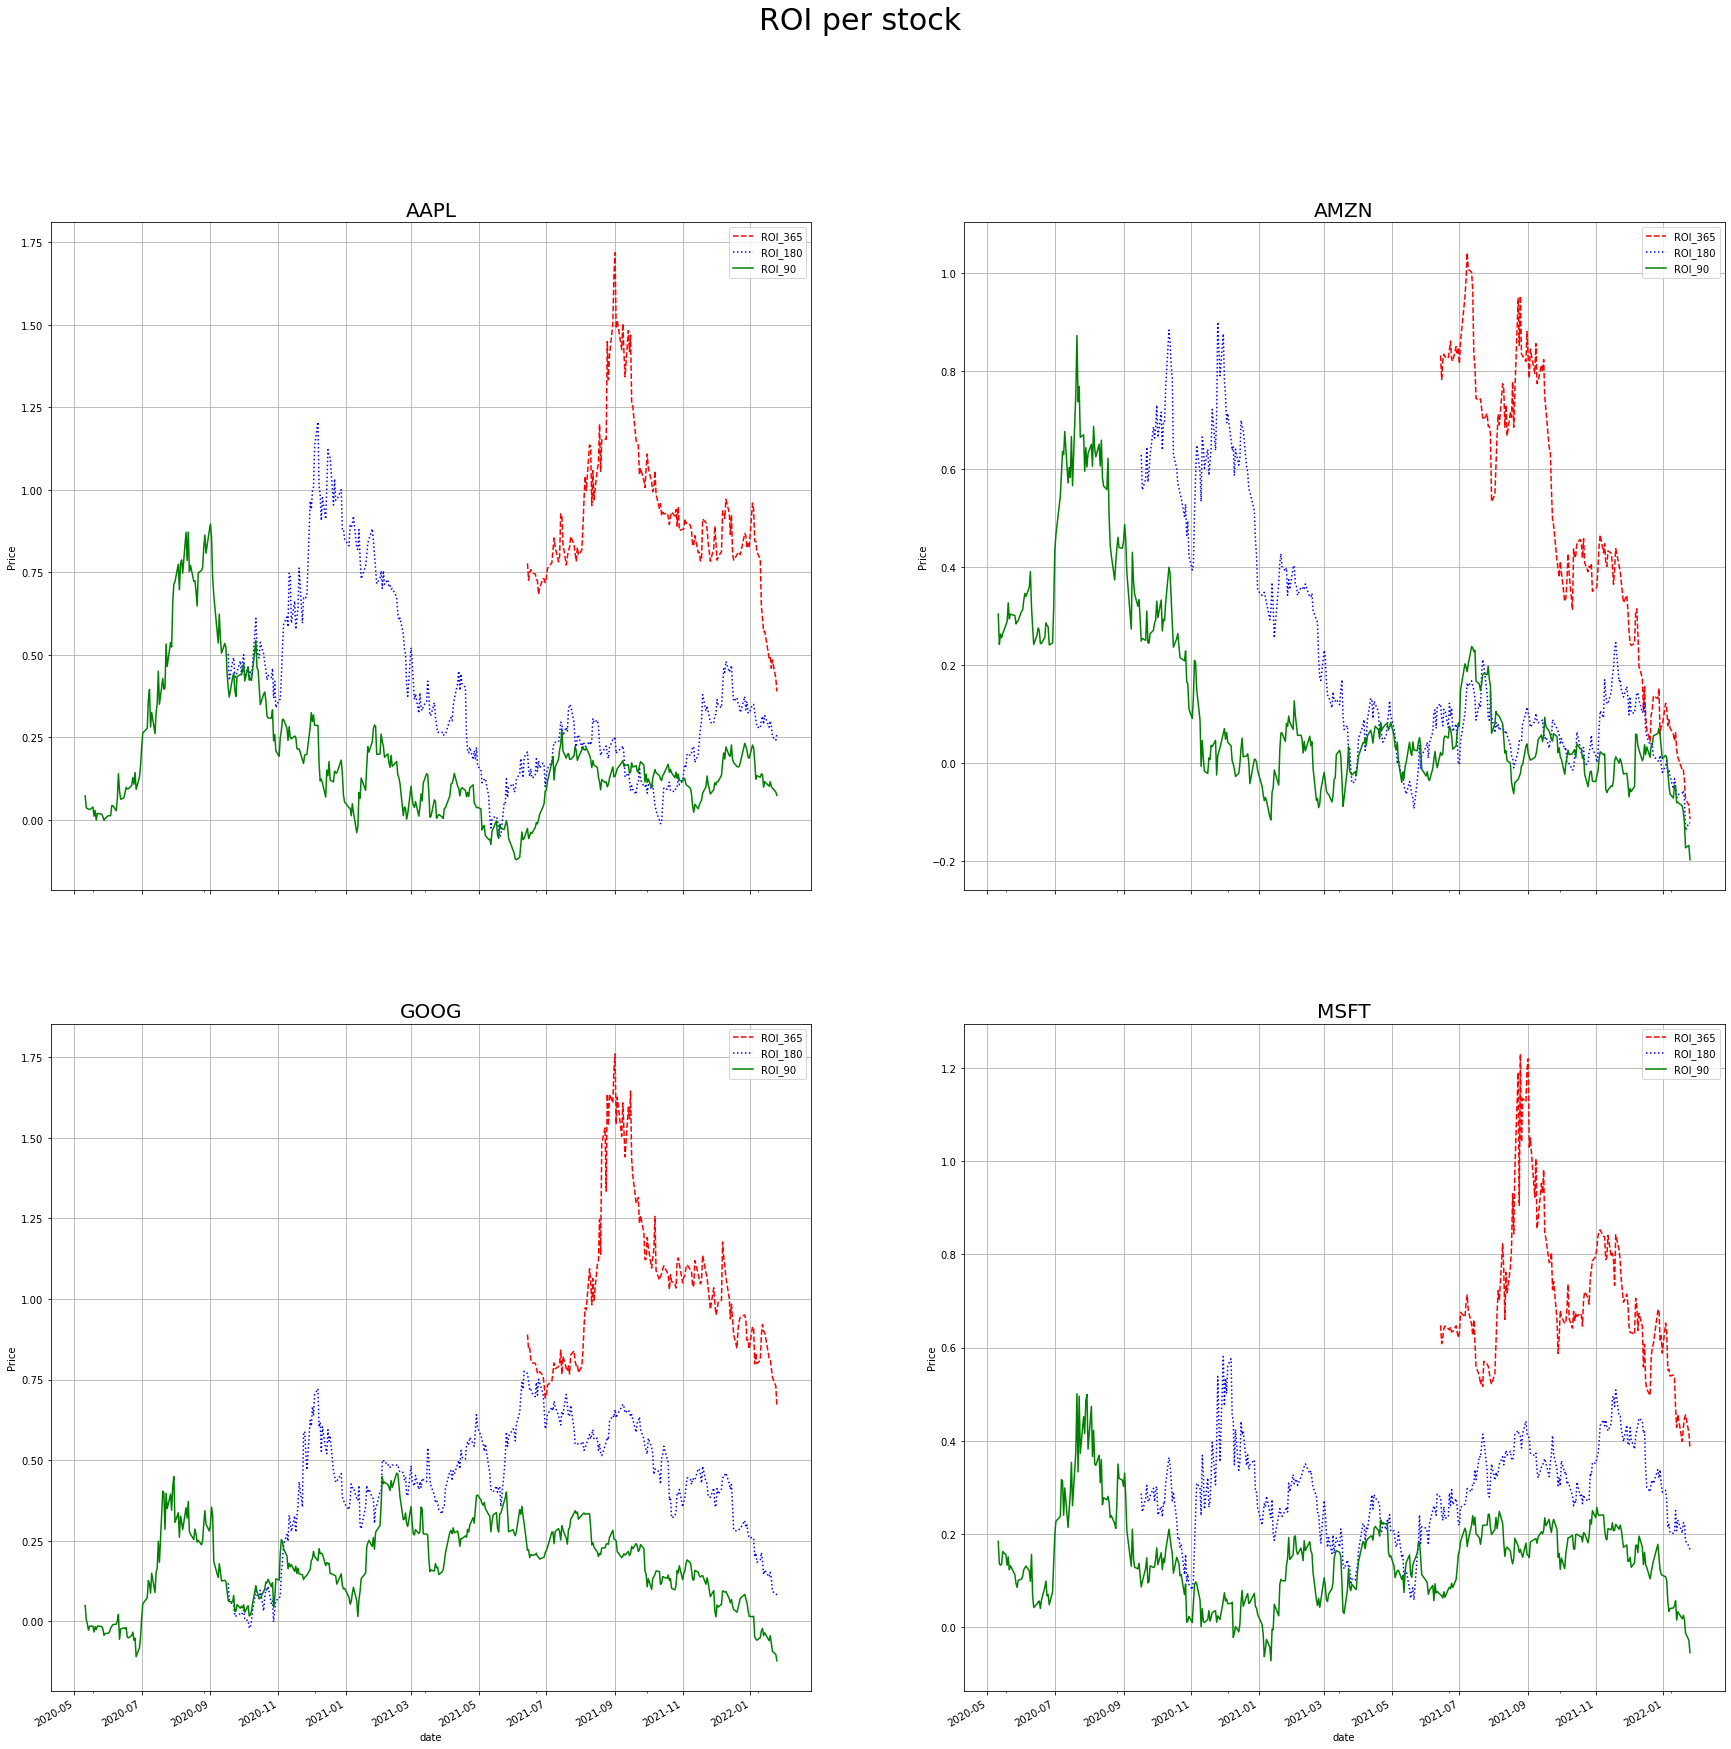

In [54]:
# Applying zip and the ROI UDF created before (to create the columns)
# Plotting it

fig, ax = plt.subplots(2, 2, sharex = True, figsize = (30,30))

ax = ax.ravel()
holdings = [365, 180, 90]
stocks = ["AAPL", "AMZN", "GOOG", "MSFT"]
colors = ["red", "blue", "green"]
linestyles = ["dashed", "dotted", "solid"]



for stock in stocks:
    for holding, color, linestyle in zip(holdings, colors, linestyles):
        stocks_clean[f"ROI_{holding}"] = ROI(stock, stocks_clean, holding)
        stocks_clean.loc["2019":, f"ROI_{holding}"].plot(color = color, linestyle = linestyle, grid = True, ax = ax[stocks.index(stock)])
        ax[stocks.index(stock)].set_ylabel("Price")
        ax[stocks.index(stock)].set_title(f"{stock}", fontsize = 20)
        ax[stocks.index(stock)].legend()
fig.suptitle("ROI per stock", fontsize = 30)  

## 5. Optimizing portfolio (1 point)

Given these two portfolios, which one has the best ROI? Keep in mind that ROI is a percentage and you can't average it directly -- you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period.

* Portfolio 1:
    * AAPL 40%
    * GOOG 30%
    * MSFT 20%
    * AMZN 10%


* Portfolio 2:
    * AAPL 30%
    * GOOG 20%
    * MSFT 10%
    * AMZN 40%

In [55]:
# Creating an UDF for price per lookback in order to being able to calculate the return

def price_holding(name, data, holding):
    data[f"{name}_price_{holding}"] = data[f"close_{name}"].shift(holding)
    

In [56]:
# Creating an UDF for return per lookback

def return_ (name, data, holding):
    data[f"return_{name}_{holding}"] = data[f"{name}_price_{holding}"]*data[f"ROI_{holding}"]
    

In [57]:
# Applying the UDFs created before for the different stocks

for stock in stocks:
    for holding in holdings:
        price_holding(stock, stocks_clean, holding)

for stock in stocks:
    for holding in holdings:
        return_(stock, stocks_clean, holding)

In [58]:
stocks_clean

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,...,return_AAPL_90,return_AMZN_365,return_AMZN_180,return_AMZN_90,return_GOOG_365,return_GOOG_180,return_GOOG_90,return_MSFT_365,return_MSFT_180,return_MSFT_90
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,...,3.838730,1354.309649,742.327168,89.394698,638.998516,527.684865,73.141749,90.849991,55.539993,7.619995
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,...,2.321384,1411.192062,731.549022,53.663789,670.640777,527.151729,44.538601,93.350006,55.130005,4.610016
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,...,-1.857742,1403.402707,613.001839,-43.270400,674.361445,441.502898,-35.972378,92.649994,46.300003,-3.760010


In [59]:
# Summing up the Stocks with their weights by using zip

weight_sum_p1 = {}
weights_p1 = [0.4,0.1,0.3,0.2]

for holding in holdings:
    for stock, weight in zip (stocks, weights_p1):
        weight_sum_p1[f"{stock}_sum_{holding}"] = (stocks_clean[f"return_{stock}_{holding}"].sum())*weight
                                                              
                                                              
                                                                  
                                                              

In [60]:
weight_sum_p1

{'AAPL_sum_365': 3461.0807352633115,
 'AMZN_sum_365': 25396.729456327477,
 'GOOG_sum_365': 45053.38833040159,
 'MSFT_sum_365': 3903.0880004882815,
 'AAPL_sum_180': 4149.411450299363,
 'AMZN_sum_180': 27830.733510217637,
 'GOOG_sum_180': 49188.64859481792,
 'MSFT_sum_180': 4059.6039947509776,
 'AAPL_sum_90': 2730.231482763997,
 'AMZN_sum_90': 18049.272036600043,
 'GOOG_sum_90': 34785.27973963238,
 'MSFT_sum_90': 2730.0420074462895}

In [61]:
# Summing all the stocks per holding period

portfolio_1_365 = sum(list(weight_sum_p1.values())[0:4])
portfolio_1_180 = sum(list(weight_sum_p1.values())[4:9])
portfolio_1_90 = sum(list(weight_sum_p1.values())[9:14])

In [62]:
# Same as for portfolio one

weight_sum_p2 = {}
weights_p2 = [0.3,0.4,0.2,0.1]

for holding in holdings:
    for stock, weight in zip (stocks, weights_p2):
        weight_sum_p2[f"{stock}_sum_{holding}"] = (stocks_clean[f"return_{stock}_{holding}"].sum())*weight
                                                              
                                                                                                                        

In [63]:
# Same as for portfolio one

portfolio_2_365 = sum(list(weight_sum_p2.values())[0:4])
portfolio_2_180 = sum(list(weight_sum_p2.values())[4:8])
portfolio_2_90 = sum(list(weight_sum_p2.values())[8:12])

In [64]:
# Checking which portfolio is performing better over 365 days

delta_365 = portfolio_1_365-portfolio_2_365
delta_365

-58355.57807478862

In [65]:
# Checking which portfolio is performing better over 180 days

delta_180 = portfolio_1_180-portfolio_2_180
delta_180

-61298.59798966597

In [66]:
# Checking which portfolio is performing better over 90 days

delta_90 = portfolio_1_90-portfolio_2_90
delta_90

-43235.375471605854

## 6. Find a better combination in your portfolio (1 point)

The new combination should beat the best portfolio that you found in the previous exercise.

In [67]:
# Calculating the different weight combinations

weights = [w/10 for w in range(1,8)]

combinations = []
for w in weights:
    for x in weights:
        for y in weights:
            for z in weights:
                if round(sum([w+x+y+z]), 1) == 1:
                    combinations.append([w, x, y, z])


In [68]:
# Creating a dict with the different combinations and its total return

weighted_p4 = {}

for element in combinations:
        weighted_p4[f"return_365{element}"] = (stocks_clean["return_AAPL_365"].sum() * element[0]) + (stocks_clean["return_AMZN_365"].sum() * element[1]) + (stocks_clean["return_GOOG_365"].sum() * element[2]) + (stocks_clean["return_MSFT_365"].sum() * element[3])

In [69]:
# First getting the max_value
# Secondly, getting the key containing the max value

max_value = max(weighted_p4.values())
max_key = max(weighted_p4, key=weighted_p4.get)
print(max_key)
print(round(max_value,1))

return_365[0.1, 0.7, 0.1, 0.1]
195611.7
